First few rows of the DataFrame:
   N                 Должность Язык.программирования Специализация  \
0  1        Junior QA engineer                   NaN     Manual QA   
1  2        Junior QA engineer                   NaN     Manual QA   
2  3         Software Engineer               C#/.NET           NaN   
3  4         Software Engineer            JavaScript           NaN   
4  5  Senior Software Engineer            JavaScript           NaN   

  Общий.опыт.работы Опыт.работы.на.текущем.месте  Зарплата.в.месяц  \
0               0.5                          0.5               400   
1  меньше 3 месяцев             меньше 3 месяцев               430   
2                 4                            1              2500   
3                 5                            4              2000   
4    10 и более лет                          0.5              4500   

   Изменение.зарплаты.за.12.месяцев    Город     Размер.компании  ...  \
0                                 0  Харьков       д

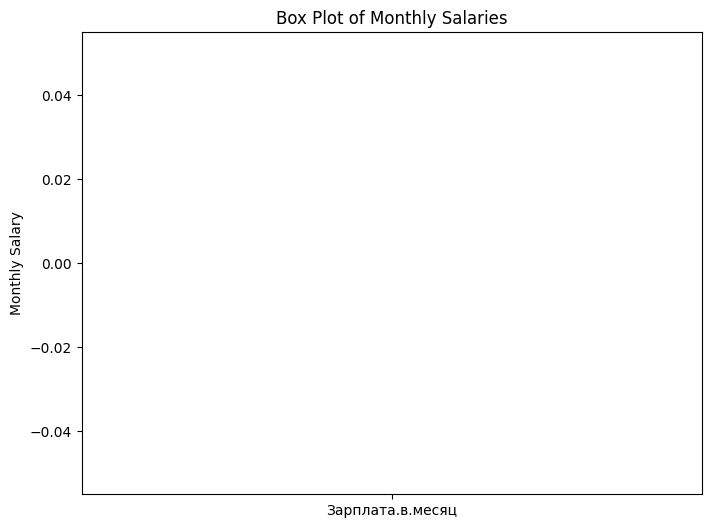

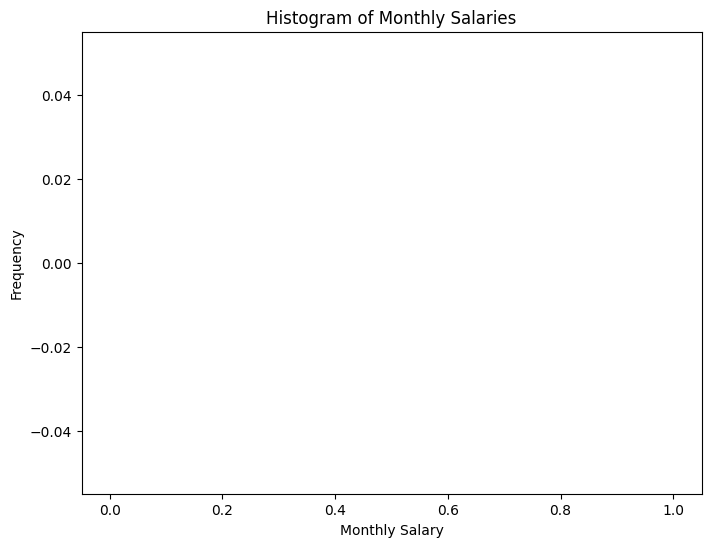

No data available for plotting.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 0: Import Libraries
%matplotlib inline

# Step 1: Read the CSV File
url = "https://drive.google.com/uc?id=1JMYqXipZpz9Y5-vyxvLEO2Y1sRBxqu-U"
data = pd.read_csv(url)

# Step 2: Display the First Few Rows
print("First few rows of the DataFrame:")
print(data.head())

# Step 3: Define the DataFrame Shape
print("\nDataFrame shape:")
print(data.shape)

# Step 4: Define Column Types
print("\nColumn types:")
print(data.dtypes)

# Step 5: Calculate Proportion of Missing Values
print("\nProportion of missing values in each column:")
print(data.isnull().sum() / len(data))

# Step 6: Remove Columns with Spaces
data = data.dropna(axis=1, how='all')

# Step 7: Recalculate Proportion of Missing Values
print("\nProportion of missing values in each column after removing columns with spaces:")
print(data.isnull().sum() / len(data))

# Step 8: Remove Rows with Missing Values
data = data.dropna()

# Step 9: Define the New DataFrame Shape
print("\nDataFrame shape after removing rows with missing values:")
print(data.shape)

# Step 10: Create a New DataFrame for Python Specialists
python_data = data[data['Язык.программирования'] == 'Python']

# Step 11: Define the Shape of the Python Data DataFrame
print("\nShape of the python_data DataFrame:")
print(python_data.shape)

# Step 12: Group by "Stanowisko" Column
grouped_data = data.groupby('Должность')

# Step 13: Aggregate Data by "Wynagrodzenie.za.miesiąc" Column
aggregated_data = grouped_data.agg({'Зарплата.в.месяц': ['min', 'max']})

# Step 14: Create a Function to Fill Average Salary
def fill_avg_salary(group):
    return group.mean()

# Step 15: Apply the Function and Create a New Column "avg"
aggregated_data['avg'] = grouped_data['Зарплата.в.месяц'].apply(fill_avg_salary)

# Step 16: Create Descriptive Statistics
print("\nDescriptive statistics for the 'avg' column:")
print(aggregated_data['avg'].describe())

# Step 17: Save the Resulting DataFrame to a CSV File
aggregated_data.to_csv('Hm2-2-result.csv')

# Additional Plots
# 1. Box plot of monthly salaries
plt.figure(figsize=(8, 6))
data['Зарплата.в.месяц'].plot(kind='box')
plt.title('Box Plot of Monthly Salaries')
plt.ylabel('Monthly Salary')
plt.show()

# 2. Histogram of monthly salaries
plt.figure(figsize=(8, 6))
data['Зарплата.в.месяц'].plot(kind='hist', bins=10, color='skyblue')
plt.title('Histogram of Monthly Salaries')
plt.xlabel('Monthly Salary')
plt.ylabel('Frequency')
plt.show()

# 3. Bar plot of average salaries by position
if not aggregated_data.empty:  # Check if aggregated_data is not empty
    plt.figure(figsize=(10, 6))
    aggregated_data['avg'].plot(kind='bar', color='green')
    plt.title('Average Salaries by Position')
    plt.xlabel('Position')
    plt.ylabel('Average Salary')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for plotting.")
